In [1]:
import geopandas as gpd
%matplotlib inline

In [2]:
parks = gpd.read_file('../data/nps')

In [3]:
parks.head()

,DATE_EDIT,GIS_LOC_ID,GIS_NOTES,GROUP_CODE,LANDS_CODE,META_MIDF,UNIT_CODE,UNIT_NAME,UNIT_TYPE,id,observed,geometry
0,2006/03/09,None,POC for this update: richard_menicke@nps.gov ...,None,None,None,GLAC,Glacier,National Park,1604373,None,"POLYGON ((-114.4755159847537 49.0009136904987,..."
1,None,None,Shifted 0.04 miles,None,None,None,CANY,Canyonlands,National Park,1604382,None,(POLYGON ((-109.8856200129457 38.4854254669334...
2,None,None,Shifted 0.06 miles,None,None,None,NOCA,North Cascades,National Park,1604517,None,(POLYGON ((-121.3776115871471 48.6357360079056...
3,2008/01/08,None,Lands,None,None,None,KOVA,Kobuk Valley,National Park,1604524,None,POLYGON ((-159.5027878412329 67.80979011213896...
4,2008/01/08,None,Lands,None,None,None,LACL,Lake Clark,National Park,1604526,None,(POLYGON ((-152.8508309821284 60.2380394475578...


In [4]:
olympic = parks[parks.UNIT_NAME == 'Olympic']

In [5]:
olympic

,DATE_EDIT,GIS_LOC_ID,GIS_NOTES,GROUP_CODE,LANDS_CODE,META_MIDF,UNIT_CODE,UNIT_NAME,UNIT_TYPE,id,observed,geometry
42,None,None,Shifted 0.06 - 0.07 miles,None,None,None,OLYM,Olympic,National Park,6749476,None,(POLYGON ((-124.064131454841 47.59871223923516...


In [6]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cf

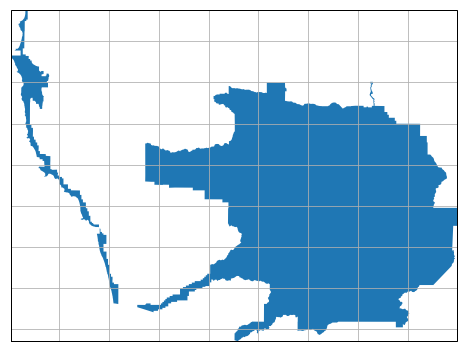

In [7]:
fig = plt.figure(figsize = (8,8))
ax = plt.axes(projection = ccrs.Mercator())
bounds = olympic.total_bounds
ax.set_extent([bounds[0], bounds[2], bounds[1], bounds[3]]) #reorder total bounds list to set extent
ax.add_geometries(olympic.geometry, crs = ccrs.PlateCarree())
ax.gridlines()

/opt/conda/lib/python3.6/site-packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/10m/physical/ne_10m_land.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


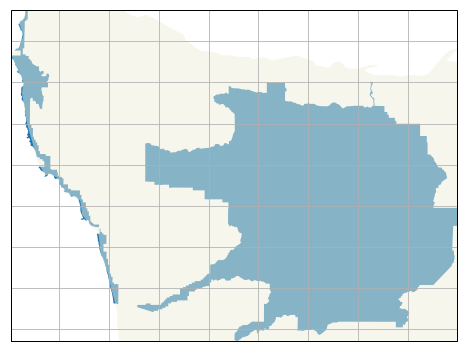

In [8]:
fig = plt.figure(figsize = (8,8))
ax = plt.axes(projection = ccrs.Mercator())
bounds = olympic.total_bounds
ax.set_extent([bounds[0], bounds[2], bounds[1], bounds[3]]) #reorder total bounds list to set extent
ax.add_geometries(olympic.geometry, crs = ccrs.PlateCarree())
ax.gridlines()

land = cf.NaturalEarthFeature(
    category='physical',
    name='land',
    scale='10m',
    facecolor=cf.COLORS['land'],
    alpha=0.5)

ax.add_feature(land)

Text(449087,5.29429e+06,'Mt. Olympus')

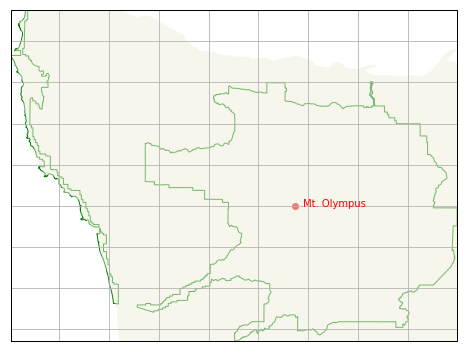

In [10]:
fig = plt.figure(figsize = (8,8))
ax = plt.axes(projection = ccrs.Mercator())
bounds = olympic.total_bounds
ax.set_extent([bounds[0], bounds[2], bounds[1], bounds[3]]) #reorder total bounds list to set extent
ax.add_geometries(olympic.geometry, crs = ccrs.PlateCarree(), facecolor = 'none', edgecolor = 'green')
ax.gridlines()

land = cf.NaturalEarthFeature(
    category='physical',
    name='land',
    scale='10m',
    facecolor=cf.COLORS['land'],
    alpha=0.5)

ax.add_feature(land)

ax.scatter(447087.3, 5294290.9, transform = ccrs.UTM(10), color='red') #cartopy plots things in an arbirary order
ax.text(447087.3 + 2000, 5294290.9, "Mt. Olympus", transform = ccrs.UTM(10), color='red')